In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import numpy as np
import re


In [34]:
time_results = pd.read_csv("results_heuristiques/time_heuristic_false.csv")
value_results = pd.read_csv("results_heuristiques/value_heuristic_false.csv")

heuristics_codes = ["CW", "2opt", "3opt", "hybrid_rc", "hybrid_mc"]
heuristics_names =["Clark-Wright", "2-opt on each route", "3-opt on each route", "Swap 2opt between routes (Real cost)","Swap 2opt between routes (Max cost)"]
value_results.columns

Index(['n', 'CW', 'LK', '2opt', '3opt', 'hybrid_rc', 'hybrid_mc', 'borne_inf'], dtype='object')

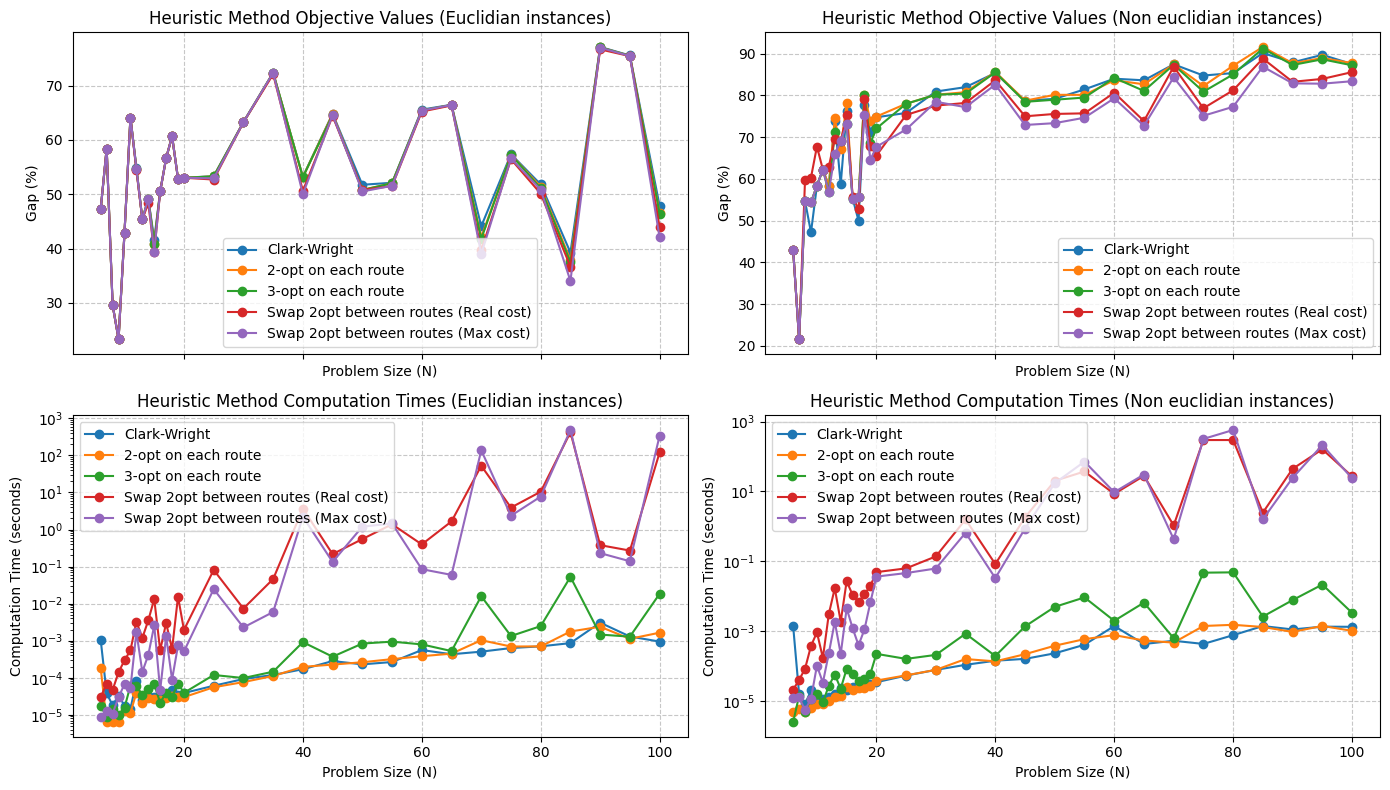

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Charger les données
value_results_true = pd.read_csv("results_heuristiques/value_heuristic_true.csv")
value_results_false = pd.read_csv("results_heuristiques/value_heuristic_false.csv")
time_results_true = pd.read_csv("results_heuristiques/time_heuristic_true.csv")
time_results_false = pd.read_csv("results_heuristiques/time_heuristic_false.csv")

# Créer une figure avec 4 sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 8),sharex=True)#, sharey='row')

# Graphique 1 : Valeurs objectives des heuristiques (true)
for i in range(len(heuristics_codes)):
    code = heuristics_codes[i]
    name = heuristics_names[i]
    N = value_results_true.n.values
    Y = 100 * (value_results_true[code].values - value_results_true["borne_inf"].values) / value_results_true[code].values
    axes[0, 0].plot(N, Y, label=name, marker='o')

axes[0, 0].set_xlabel('Problem Size (N)')
axes[0, 0].set_ylabel('Gap (%)')
axes[0, 0].set_title('Heuristic Method Objective Values (Euclidian instances)')
axes[0, 0].legend()
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# Graphique 2 : Valeurs objectives des heuristiques (false)
for i in range(len(heuristics_codes)):
    code = heuristics_codes[i]
    name = heuristics_names[i]
    N = value_results_false.n.values
    Y = 100 * (value_results_false[code].values - value_results_false["borne_inf"].values) / value_results_false[code].values
    axes[0, 1].plot(N, Y, label=name, marker='o')

axes[0, 1].set_xlabel('Problem Size (N)')
axes[0, 1].set_ylabel('Gap (%)')
axes[0, 1].set_title('Heuristic Method Objective Values (Non euclidian instances)')
axes[0, 1].legend()
axes[0, 1].grid(True, linestyle='--', alpha=0.7)

# Graphique 3 : Temps de calcul des heuristiques (false)
for i in range(len(heuristics_codes)):
    code = heuristics_codes[i]
    name = heuristics_names[i]
    N = time_results_false.n.values
    axes[1, 1].semilogy(N, time_results_false[code].values, label=name, marker='o')

axes[1, 1].set_xlabel('Problem Size (N)')
axes[1, 1].set_title('Heuristic Method Computation Times (Non euclidian instances)')
axes[1, 0].set_ylabel('Computation Time (seconds)')
axes[1, 1].set_ylabel('Computation Time (seconds)')
axes[1, 1].legend()
axes[1, 1].grid(True, linestyle='--', alpha=0.7)

# Graphique 4 : Temps de calcul des heuristiques (true)
for i in range(len(heuristics_codes)):
    code = heuristics_codes[i]
    name = heuristics_names[i]
    N = time_results_true.n.values
    axes[1, 0].semilogy(N, time_results_true[code].values, label=name, marker='o')

axes[1, 0].set_xlabel('Problem Size (N)')
axes[1, 0].set_title('Heuristic Method Computation Times (Euclidian instances)')
axes[1, 0].legend()
axes[1, 0].grid(True, linestyle='--', alpha=0.7)

# Ajuster la disposition
plt.tight_layout()
plt.show()


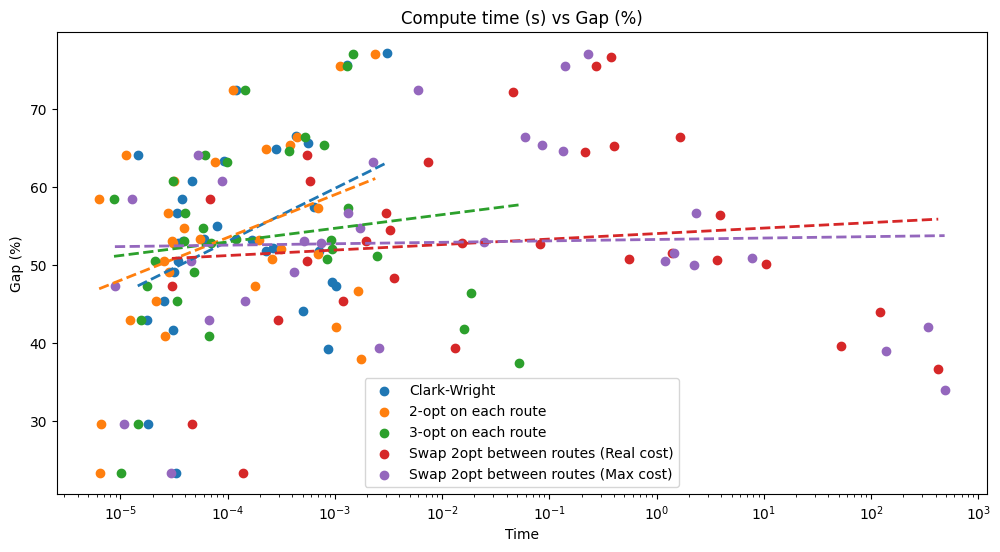

In [36]:
plt.figure(figsize=(12, 6))

for i in range(len(heuristics_codes)):
    code = heuristics_codes[i]
    name = heuristics_names[i]
    
    Y = 100 * (value_results_true[code].values - value_results_true["borne_inf"].values) / value_results_true[code].values
    X = time_results_true[code].values
    log_X = [np.log10(x) for x in X]

    X_reshaped = np.array(log_X).reshape(-1, 1)
    
    reg = linear_model.LinearRegression()
    reg.fit(X_reshaped, Y)
    
    plt.scatter(X, Y, label=name, marker='o')
    
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_log = [np.log10(x) for x in X_range]
    Y_pred = reg.predict(X_range_log)
    
    # Plot the regression line
    plt.plot(X_range, Y_pred, linewidth=2, ls='--')

# Set y-axis to logarithmic scale
plt.xscale('log')

plt.xlabel("Time")
plt.ylabel("Gap (%)")
plt.title("Compute time (s) vs Gap (%)")
plt.legend()
plt.show()


In [37]:
df = pd.read_csv("results_exact_methods/results_time.csv")

methods = [
    "plans coupants",
    "B&C",
    "B&C with heuristic",
    "dual",
    "dual with warm start"
]

plt.figure(figsize=(10, 6))

for method in methods:
    # Extract the times (in seconds) for this method.
    times = df[method].values
    # Sort the times in ascending order.
    times_sorted = np.sort(times)
    times_filtered = times_sorted[times_sorted < 299]    
    # The cumulative count at each time is just 1, 2, …, N (number of instances)
    cumulative_counts = np.arange(1, len(times_filtered) + 1)
    
    # Plot a step function. The 'where="post"' argument ensures the step changes occur after the value.
    plt.step(times_filtered, cumulative_counts, where='post', label=method)

#plt.xscale('log')
plt.xlabel("Time (s)")
plt.ylabel("Number of Instances Solved")
plt.title("Evolution of the Number of Solved Instances as a Function of Time")
plt.legend()
plt.grid(True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'results_exact_methods/results_time.csv'

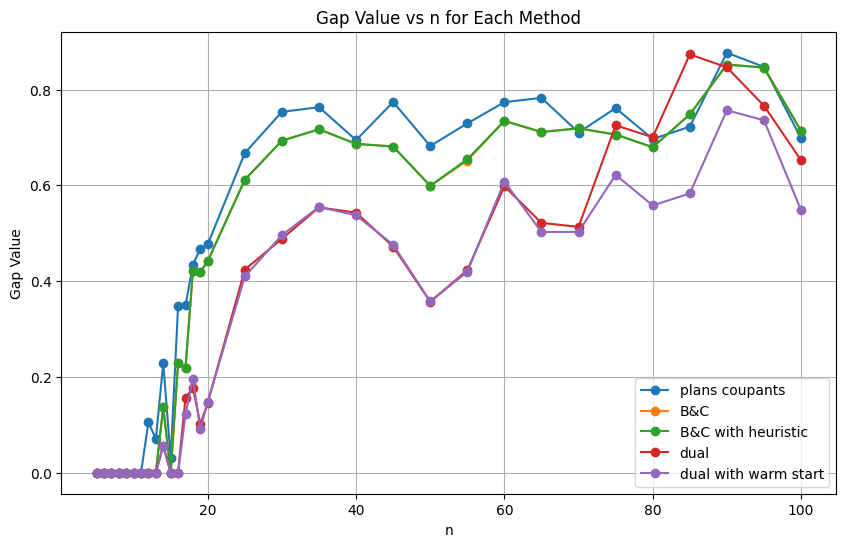

In [ ]:
# Load the CSV file (adjust the file name/path as needed)
df = pd.read_csv("results_exact_methods/results_gap.csv")

# If you want one curve per method (averaging over the 'euclidien' column),
# group the data by 'n' and compute the mean for each method.
grouped = df.groupby("n").mean().reset_index()

# List of method columns to plot (these should match your CSV headers)
methods = [
    "plans coupants",
    "B&C",
    "B&C with heuristic",
    "dual",
    "dual with warm start"
]

plt.figure(figsize=(10, 6))

# Plot a line (curve) for each method
for method in methods:
    plt.plot(grouped["n"], grouped[method], marker='o', label=method)

plt.xlabel("n")
plt.ylabel("Gap Value")
plt.title("Gap Value vs n for Each Method")
plt.legend()
plt.grid(True)
plt.show()


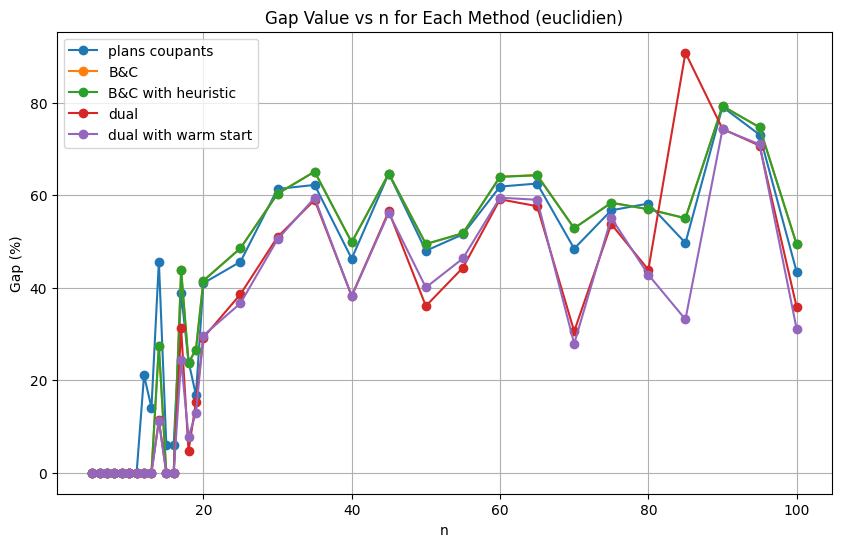

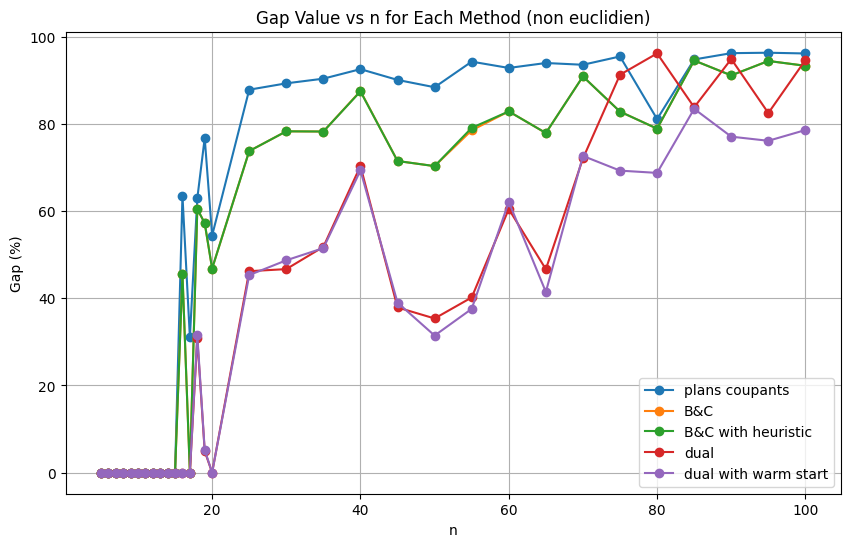

In [ ]:
# For euclidien == true:
df_true = df[df["euclidien"] == True].groupby("n").mean().reset_index()

plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(df_true["n"], df_true[method]*100, marker='o', label=method)
plt.xlabel("n")
plt.ylabel("Gap (%)")
plt.title("Gap Value vs n for Each Method (euclidien)")
plt.legend()
plt.grid(True)
plt.show()

df_true = df[df["euclidien"] == False].groupby("n").mean().reset_index()

plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(df_true["n"], df_true[method]*100, marker='o', label=method)
plt.xlabel("n")
plt.ylabel("Gap (%)")
plt.title("Gap Value vs n for Each Method (non euclidien)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import re

def extract_data_from_file(file_name):
    # Read the content of the file
    with open(file_name, 'r') as file:
        data = file.read()

    # Extract the relevant information using regular expressions
    pattern = r"File: data/n_(\d+)-euclidean_(true|false).*Meilleure borne\s*:\s*([\d.]+)"
    matches = re.findall(pattern, data)

    # Create a DataFrame
    df = pd.DataFrame(matches, columns=['n', 'euclidien', 'borne_inf'])
    df['n'] = df['n'].astype(int)  # Convert 'n' to integer
    df['borne_inf'] = df['borne_inf'].astype(float)  # Convert 'borne_inf' to float

    return df

def merge_dataframes(df_text, value_results_true, value_results_false):
    # Select only the necessary columns from the CSV DataFrames
    value_results_true = value_results_true[['n', '3opt']]
    value_results_false = value_results_false[['n', '3opt']]

    # Rename columns to avoid conflicts
    value_results_true.rename(columns={'3opt': 'sol_heuristique'}, inplace=True)
    value_results_false.rename(columns={'3opt': 'sol_heuristique'}, inplace=True)

    # Merge the DataFrames
    merged_df_true = pd.merge(df_text[df_text['euclidien'] == 'true'], value_results_true, on=['n'], how='left')
    merged_df_false = pd.merge(df_text[df_text['euclidien'] == 'false'], value_results_false, on=['n'], how='left')

    # Combine the results
    combined_df = pd.concat([merged_df_true, merged_df_false], ignore_index=True)

    # Calculate the gap
    combined_df['gap'] = ((combined_df['sol_heuristique'] - combined_df['borne_inf']) / combined_df['borne_inf']) * 100

    # Select the desired columns
    final_df = combined_df[['n', 'euclidien', 'sol_heuristique', 'borne_inf', 'gap']]

    return final_df

# Example usage
df_text = extract_data_from_file('results_exact_methods/borne_inf.txt')
value_results_true = pd.read_csv('results_heuristiques/value_heuristic_true.csv')
value_results_false = pd.read_csv('results_heuristiques/value_heuristic_false.csv')
final_df = merge_dataframes(df_text, value_results_true, value_results_false)
#final_df


/var/folders/87/1h0l3ncd481b0x7jwccs058w0000gn/T/ipykernel_17203/2157370189.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value_results_true.rename(columns={'3opt': 'sol_heuristique'}, inplace=True)
/var/folders/87/1h0l3ncd481b0x7jwccs058w0000gn/T/ipykernel_17203/2157370189.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value_results_false.rename(columns={'3opt': 'sol_heuristique'}, inplace=True)


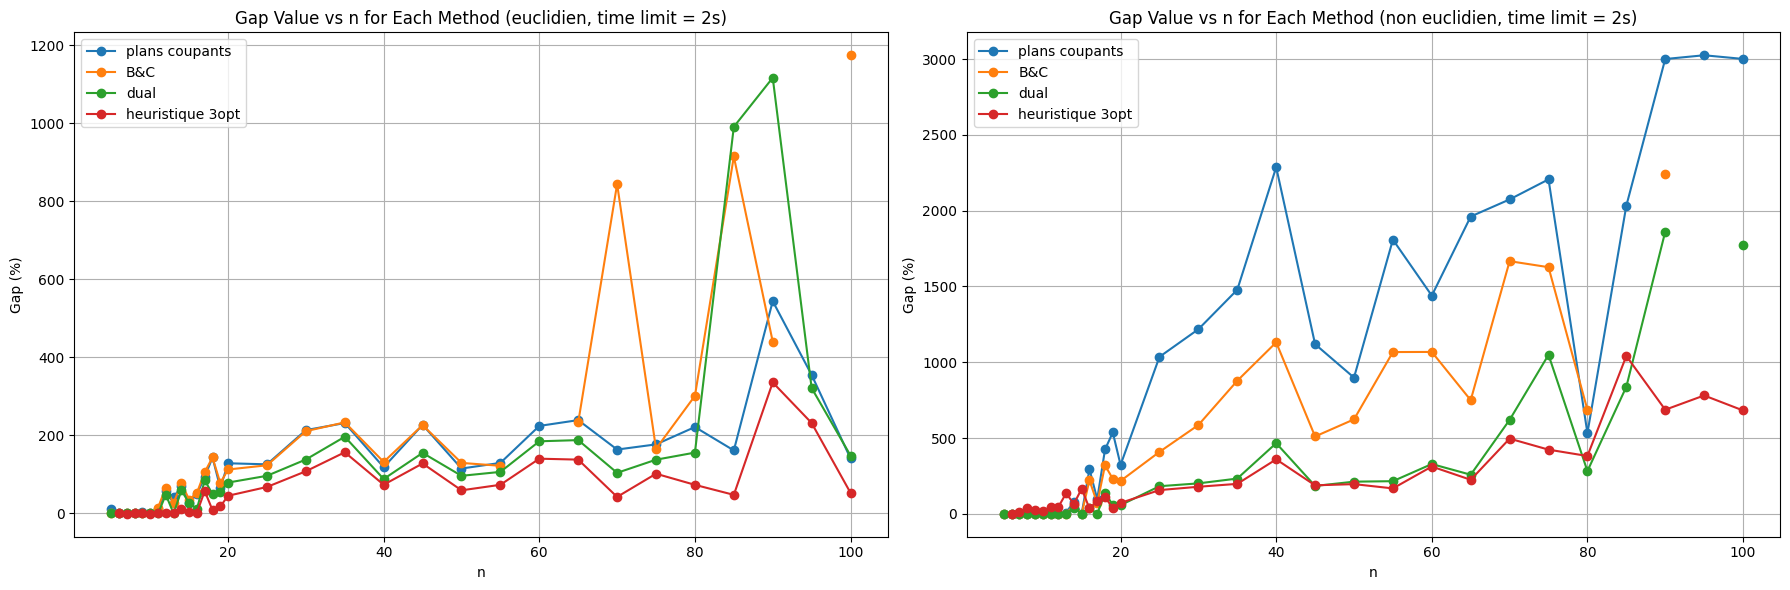

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df and final_df are already defined
df = pd.read_csv("results_exact_methods/results_gap_2.0.csv")

# For euclidien == True
df_true = df[df["euclidien"] == True].groupby("n").mean().reset_index()
final_df_true = final_df[final_df["euclidien"] == "true"]

# For euclidien == False
df_false = df[df["euclidien"] == False].groupby("n").mean().reset_index()
final_df_false = final_df[final_df["euclidien"] == "false"]

methods = [
    "plans coupants",
    "B&C",
    "dual"
]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for euclidien == True
for method in methods:
    axes[0].plot(df_true["n"], df_true[method] * 100, marker='o', label=method)
axes[0].plot(final_df_true["n"], final_df_true["gap"], marker='o', label="heuristique 3opt")
axes[0].set_xlabel("n")
axes[0].set_ylabel("Gap (%)")
axes[0].set_title("Gap Value vs n for Each Method (euclidien, time limit = 2s)")
axes[0].legend()
axes[0].grid(True)

# Plot for euclidien == False
for method in methods:
    axes[1].plot(df_false["n"], df_false[method] * 100, marker='o', label=method)
axes[1].plot(final_df_false["n"], final_df_false["gap"], marker='o', label="heuristique 3opt")
axes[1].set_xlabel("n")
axes[1].set_ylabel("Gap (%)")
axes[1].set_title("Gap Value vs n for Each Method (non euclidien, time limit = 2s)")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [68]:
value_results_true = pd.read_csv("results_heuristiques/value_heuristic_true.csv")
value_results_false = pd.read_csv("results_heuristiques/value_heuristic_false.csv")
time_results_true = pd.read_csv("results_heuristiques/time_heuristic_true.csv")
time_results_false = pd.read_csv("results_heuristiques/time_heuristic_false.csv")

for i in range(len(value_results_false)):
    gap_f = 100*(value_results_false.hybrid_rc[i] - value_results_false.borne_inf[i])/value_results_false.borne_inf[i]
    gap_t = 100*(value_results_true.hybrid_rc[i] - value_results_true.borne_inf[i])/value_results_true.borne_inf[i]
    temps_t = time_results_true.hybrid_rc[i]
    temps_f = time_results_false.hybrid_rc[i]
    #print(f"{value_results_true.n[i]},true : {gap_t}, {temps_t}s")
    #print(f"{value_results_false.n[i]},false : {gap_f}, {temps_t}s")

In [ ]:
import pandas as pd

# Load the data from CSV files
value_results_true = pd.read_csv("results_heuristiques/value_heuristic_true.csv")
value_results_false = pd.read_csv("results_heuristiques/value_heuristic_false.csv")
time_results_true = pd.read_csv("results_heuristiques/time_heuristic_true.csv")
time_results_false = pd.read_csv("results_heuristiques/time_heuristic_false.csv")

# Existing LaTeX table as a list of strings
latex_table = [
    r"\begin{tabular}{lccccccccc}",
    r"\hline",
    r"\textbf{Instance} & \textbf{PR} & \multicolumn{2}{c}{\textbf{Plans coupants}} & \multicolumn{2}{c}{\textbf{Branch-and-cut}} & \multicolumn{2}{c}{\textbf{Dualisation}} & \multicolumn{2}{c}{\textbf{Heuristique}} \\",
    r"",
    r"& & \textbf{Time} & \textbf{Gap} & \textbf{Time} & \textbf{Gap} & \textbf{Time} & \textbf{Gap} & \textbf{Time} & \textbf{Gap} \\",
    r"\hline",
    r"n\_40\_euclidean-false &1214\% &642s &1483\% &600s &691\% &600s &240\% & & \\",
    r"n\_40\_euclidean-true&92\% &600s &91\% &600s &100\% &600s &60\% & & \\",
    r"n\_45\_euclidean-false &699\% &601s &971\% &600s &261\% &601s &60\% & & \\",
    r"n\_45\_euclidean-true& 185\%&602s &183\% &600s &182\% &600s &130\% & & \\",
    r"n\_50\_euclidean-false & 614\%&600s &779\% &600s &263\% &600s &102\% & & \\",
    r"n\_50\_euclidean-true& 83\%& 601s&83\% &600s &92\% &606s &60\% & & \\",
    r"n\_55\_euclidean-false &1336 &601s &1662\% &600s &339\% &600s &80\% & & \\",
    r"n\_55\_euclidean-true&110\% &600s &103\% &600s &107\% &600s &82\% & & \\",
    r"n\_60\_euclidean-false &1254\% &600s &1264\% &600s &495\% &601s &179\% & & \\",
    r"n\_60\_euclidean-true&164\% &600s &167\% &600s &184\% &600s &142\% & & \\",
    r"n\_65\_euclidean-false &1305\% &600s &1599\% &600s &390\% &600s &119\% & & \\",
    r"n\_65\_euclidean-true& 183\%&600s &174\% &600s &183\% &605s &155\% & & \\",
    r"n\_70\_euclidean-false & 1748\%&603s &1590\% &600s &914\% &601s &408\% & & \\",
    r"n\_70\_euclidean-true&126\% &601s &117\% &600s &97\% &621s &64\% & & \\",
    r"n\_75\_euclidean-false & 1533\%&601s &2114\% &600s &523\% &600s &142\% & & \\",
    r"n\_75\_euclidean-true&138\% &611s &146\% &600s &137\% &601s &119\% & & \\",
    r"n\_80\_euclidean-false & 398\%&601s &491\% &600s &388\% &606s &71\% & & \\",
    r"n\_80\_euclidean-true&154\% &604s &155\% &600s &134\% &602s &90\% & & \\",
    r"n\_85\_euclidean-false &2014\% &602s &1771\% &600s &1679\% &602s &624\% & & \\",
    r"n\_85\_euclidean-true& 131\%&630s &114\% &600s &98\% &604s &69\% & & \\",
    r"n\_90\_euclidean-false & 2400\%&602s &2629\% &600s &958\% &600s &415\% & & \\",
    r"n\_90\_euclidean-true&395\% &602s &396\% &600s &377\% &611s &296\% & & \\",
    r"n\_95\_euclidean-false & 2578\%&602s &2745\% &600s &1480\% &600s &497\% & & \\",
    r"n\_95\_euclidean-true&292\% &602s &283\% &600s &303\% &600s &257\% & & \\",
    r"n\_100\_euclidean-false &2458\% &601s & 2697\%&600s &1422\% &600s &453\% & & \\",
    r"n\_100\_euclidean-true&81\% & 601s& 104\% &600s &100\% &600s &71\% & & \\",
    r"\hline",
    r"\end{tabular}"
]

# Update the LaTeX table with new gap and time values
for i in range(len(value_results_false)):
    n = value_results_true.n[i]

    # Calculate gaps and times
    gap_f = 100 * (value_results_false.hybrid_rc[i] - value_results_false.borne_inf[i]) / value_results_false.borne_inf[i]
    gap_t = 100 * (value_results_true.hybrid_rc[i] - value_results_true.borne_inf[i]) / value_results_true.borne_inf[i]
    temps_t = time_results_true.hybrid_rc[i]
    temps_f = time_results_false.hybrid_rc[i]

    # Find and update the rows for true and false instances
    for j, line in enumerate(latex_table):
        #print(j,line)
        if f"n\_{n}\_euclidean-true" in line:
            latex_table[j] = line.replace("& & \\", f"& {temps_t:.2f}s & {gap_t:.2f}\\% \\")
        elif f"n\_{n}\_euclidean-false" in line:
            latex_table[j] = line.replace("& & \\", f"& {temps_f:.2f}s & {gap_f:.2f}\\% \\")
        


# Join the list into a single string
latex_table_str = "\n".join(latex_table)

# Print the updated LaTeX table
print(latex_table_str)


\begin{tabular}{lccccccccc}
\hline
\textbf{Instance} & \textbf{PR} & \multicolumn{2}{c}{\textbf{Plans coupants}} & \multicolumn{2}{c}{\textbf{Branch-and-cut}} & \multicolumn{2}{c}{\textbf{Dualisation}} & \multicolumn{2}{c}{\textbf{Heuristique}} \\

& & \textbf{Time} & \textbf{Gap} & \textbf{Time} & \textbf{Gap} & \textbf{Time} & \textbf{Gap} & \textbf{Time} & \textbf{Gap} \\
\hline
n\_5 instance& 8.8\%& 0.1s & 0\%&0.01s &0\% &0.01s &0\% &90\% & $3\times10^{-5}s$\\
n\_5\_euclidean-false &17.4\% &0.2s & 0\% &0.08s &0\% &0.03s &0\% & & \\
n\_5\_euclidean-true& 10.4\%&0.2s & 0\% &0.03s &0\% &0.03s &0\% & & \\
n\_6\_euclidean-false & 29.5\%&0.1s & 0\% &0.11s &0\% &0.19s &0\% & 0.00s & 75.47\% \\
n\_6\_euclidean-true& 2.2\%&0.2s & 0\% &0.19s &0\% &0.2s &0\% & 0.00s & 89.78\% \\
n\_7\_euclidean-false & 11.3\%&0.3s & 0\% &0.002s &0\% &0.36s &0\% & 0.00s & 27.60\% \\
n\_7\_euclidean-true& 5\%&2.5s & 0\% &0.4s &0\% &1.27s &0\% & 0.00s & 140.50\% \\
n\_8\_euclidean-false & 40\%&2.2 & 0\% &0.07s &

<>:74: SyntaxWarning: invalid escape sequence '\_'
<>:74: SyntaxWarning: invalid escape sequence '\_'
<>:76: SyntaxWarning: invalid escape sequence '\_'
<>:76: SyntaxWarning: invalid escape sequence '\_'
<>:74: SyntaxWarning: invalid escape sequence '\_'
<>:74: SyntaxWarning: invalid escape sequence '\_'
<>:76: SyntaxWarning: invalid escape sequence '\_'
<>:76: SyntaxWarning: invalid escape sequence '\_'
/var/folders/87/1h0l3ncd481b0x7jwccs058w0000gn/T/ipykernel_17203/2349058275.py:74: SyntaxWarning: invalid escape sequence '\_'
  if f"n\_{n}\_euclidean-true" in line:
/var/folders/87/1h0l3ncd481b0x7jwccs058w0000gn/T/ipykernel_17203/2349058275.py:74: SyntaxWarning: invalid escape sequence '\_'
  if f"n\_{n}\_euclidean-true" in line:
/var/folders/87/1h0l3ncd481b0x7jwccs058w0000gn/T/ipykernel_17203/2349058275.py:76: SyntaxWarning: invalid escape sequence '\_'
  elif f"n\_{n}\_euclidean-false" in line:
/var/folders/87/1h0l3ncd481b0x7jwccs058w0000gn/T/ipykernel_17203/2349058275.py:76: Synta